# AF correction

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load data
case_9_2_1 = pd.read_csv("../data/tumor_s3_non_af/9_2_1.csv")
case_9_2_2 = pd.read_csv("../data/tumor_s3_non_af/9_2_2.csv")
case_9_3_1 = pd.read_csv("../data/tumor_s3_non_af/9_3_1.csv")
case_9_3_2 = pd.read_csv("../data/tumor_s3_non_af/9_3_2.csv")
case_9_14_1 = pd.read_csv("../data/tumor_s3_non_af/9_14_1.csv")
case_9_14_2 = pd.read_csv("../data/tumor_s3_non_af/9_14_2.csv")
case_9_15_1 = pd.read_csv("../data/tumor_s3_non_af/9_15_1.csv")
case_9_15_2 = pd.read_csv("../data/tumor_s3_non_af/9_15_2.csv")

In [3]:
case_9_14_1.columns

Index(['CellID', 'Hoechst1', 'A488', 'A555', 'A647', 'Hoechst2', 'PolICTD',
       'pERK', 'p53', 'Hoechst3', 'Ki67', 'panCK', 'CD45', 'Hoechst4', 'Ecad',
       'SMA', 'Vimentin', 'Hoechst5', 'EGFR', 'pRB', 'p21', 'Hoechst6', 'CD20',
       'aSMA', 'PD1', 'Hoechst7', 'PCNA', 'ER', 'HER2', 'Hoechst8', 'CK14',
       'CK19', 'CK17', 'Hoechst9', 'LaminA/C', 'AR', 'H2ax', 'Hoechst10', 'PR',
       'HLAA', 'CK5', 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength',
       'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation'],
      dtype='object')

In [4]:
case_9_2_2.columns

Index(['CellID', 'DNA1', 'goat-anti-rabbit', 'A555', 'donkey-anti-mouse',
       'DNA2', 'pERK', 'pERK-555', 'Rad51', 'DNA3', 'CCND1', 'Vimentin',
       'aSMA', 'DNA4', 'Ecad', 'ER', 'PR', 'DNA5', 'EGFR', 'pRB', 'CD45',
       'DNA6', 'Ki67', 'CK19', 'p21', 'DNA7', 'CK14', 'AR', 'cPARP', 'DNA8',
       'CK17', 'CK7', 'HER2', 'X_centroid', 'Y_centroid', 'Area',
       'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity',
       'Extent', 'Orientation'],
      dtype='object')

In [5]:
def SNR(df, mappings):
    for AF_key in mappings:
        for marker in mappings[AF_key]:
            df[marker] = df[marker] / AF_key

    return df

In [6]:
AF_mapping_9_2_1 = {
    np.mean(case_9_2_1['goat-anti-rabbit']) : ['pERK', "CCND1","Ecad","EGFR","Ki67", "CK14","CK17" ],
    np.mean(case_9_2_1['A555']) : ["Vimentin","ER", "pRB", "CK19", "AR", "CK7"],
    np.mean(case_9_2_1['donkey-anti-mouse']) : ["Rad51","PR","CD45", "p21","cPARP", "HER2", "aSMA" ]
}

AF_mapping_9_2_2 = {
    np.mean(case_9_2_2['goat-anti-rabbit']) : ['pERK', "CCND1","Ecad","EGFR","Ki67", "CK14","CK17" ],
    np.mean(case_9_2_2['A555']) : ["Vimentin","ER", "pRB", "CK19", "AR", "CK7"],
    np.mean(case_9_2_2['donkey-anti-mouse']) : ["Rad51","PR","CD45", "p21","cPARP", "HER2","aSMA" ]
}



AF_mapping_9_3_1 = {
    np.mean(case_9_3_1['goat-anti-rabbit']) : ['pERK', "CCND1","Ecad","EGFR","Ki67", "CK14","CK17" ],
    np.mean(case_9_3_1['A555']) : ["Vimentin","ER", "pRB", "CK19", "AR", "CK7"],
    np.mean(case_9_3_1['donkey-anti-mouse']) : ["Rad51","PR","CD45", "p21","cPARP", "HER2","aSMA" ]
}

AF_mapping_9_3_2 = {
    np.mean(case_9_3_2['goat-anti-rabbit']) : ['pERK', "CCND1","Ecad","EGFR","Ki67", "CK14","CK17" ],
    np.mean(case_9_3_2['A555']) : ["Vimentin","ER", "pRB", "CK19", "AR", "CK7"],
    np.mean(case_9_3_2['donkey-anti-mouse']) : ["Rad51","PR","CD45", "p21","cPARP", "HER2","aSMA" ]
}


AF_mapping_9_14_1 = {
    np.mean(case_9_14_1['A488']) : ['PolICTD','Ki67',"Ecad", "EGFR", "CD20", "PCNA", "CK14", "LaminA/C", "PR" ],
    np.mean(case_9_14_1['A555']) : ['pERK', 'panCK', "SMA", "pRB", "aSMA", "ER", "CK19", "AR","HLAA" ],
    np.mean(case_9_14_1['A647']) : ['p53', 'CD45', "Vimentin", "p21", "PD1", "HER2", "CK17", "H2ax", "CK5"]
}

AF_mapping_9_14_2 = {
   np.mean(case_9_14_2['A488']) : ['PolICTD','Ki67',"Ecad", "EGFR", "CD20", "PCNA", "CK14", "LaminA/C", "PR" ],
   np.mean(case_9_14_2['A555']) : ['pERK', 'panCK', "SMA", "pRB", "aSMA", "ER", "CK19", "AR","HLAA" ],
   np.mean(case_9_14_2['A647']) : ['p53', 'CD45', "Vimentin", "p21" ,"PD1", "HER2", "CK17", "H2ax", "CK5"]
}

AF_mapping_9_15_1 = {
    np.mean(case_9_15_1['A488']) : ['PolICTD','Ki67',"Ecad", "EGFR", "CD20", "PCNA", "CK14", "LaminA/C", "PR" ],
    np.mean(case_9_15_1['A555']) : ['pERK', 'panCK', "SMA", "pRB", "aSMA", "ER", "CK19", "AR","HLAA" ],
    np.mean(case_9_15_1['A647']) : ['p53', 'CD45', "Vimentin", "p21", "PD1", "HER2", "CK17", "H2ax", "CK5"]
}

AF_mapping_9_15_2 = {
    np.mean(case_9_15_2['A488']) : ['PolICTD','Ki67',"Ecad", "EGFR", "CD20", "PCNA", "CK14", "LaminA/C", "PR" ],
    np.mean(case_9_15_2['A555']) : ['pERK', 'panCK', "SMA", "pRB", "aSMA", "ER", "CK19", "AR","HLAA" ],
    np.mean(case_9_15_2['A647']) : ['p53', 'CD45', "Vimentin", "p21", "PD1", "HER2", "CK17", "H2ax", "CK5"]
}


## Case 9 2

In [7]:
columns_9_2_1 = [item for sublist in AF_mapping_9_2_1.values() for item in sublist]
columns_9_2_2 = [item for sublist in AF_mapping_9_2_2.values() for item in sublist]

In [8]:
snr_9_2_1 = SNR(case_9_2_1, mappings = AF_mapping_9_2_1)
snr_9_2_2 = SNR(case_9_2_2, mappings = AF_mapping_9_2_2)

## Case 9 3

In [9]:
columns_9_3_1 = [item for sublist in AF_mapping_9_3_1.values() for item in sublist]
columns_9_3_2 = [item for sublist in AF_mapping_9_3_2.values() for item in sublist]

In [10]:
snr_9_3_1 = SNR(case_9_3_1, mappings = AF_mapping_9_3_1)
snr_9_3_2 = SNR(case_9_3_2, mappings = AF_mapping_9_3_2)

## Case 9 14

In [11]:
columns_9_14_1 = [item for sublist in AF_mapping_9_14_1.values() for item in sublist]
columns_9_14_2 = [item for sublist in AF_mapping_9_14_2.values() for item in sublist]

In [12]:
snr_9_14_1 = SNR(case_9_14_1, mappings = AF_mapping_9_14_1)
snr_9_14_2 = SNR(case_9_14_2, mappings = AF_mapping_9_14_2)

## Case 9 15

In [13]:
columns_9_15_1 = [item for sublist in AF_mapping_9_15_1.values() for item in sublist]
columns_9_15_2 = [item for sublist in AF_mapping_9_15_2.values() for item in sublist]

In [14]:
snr_9_15_1 = SNR(case_9_15_1, mappings = AF_mapping_9_15_1)
snr_9_15_2 = SNR(case_9_15_2, mappings = AF_mapping_9_15_2)

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

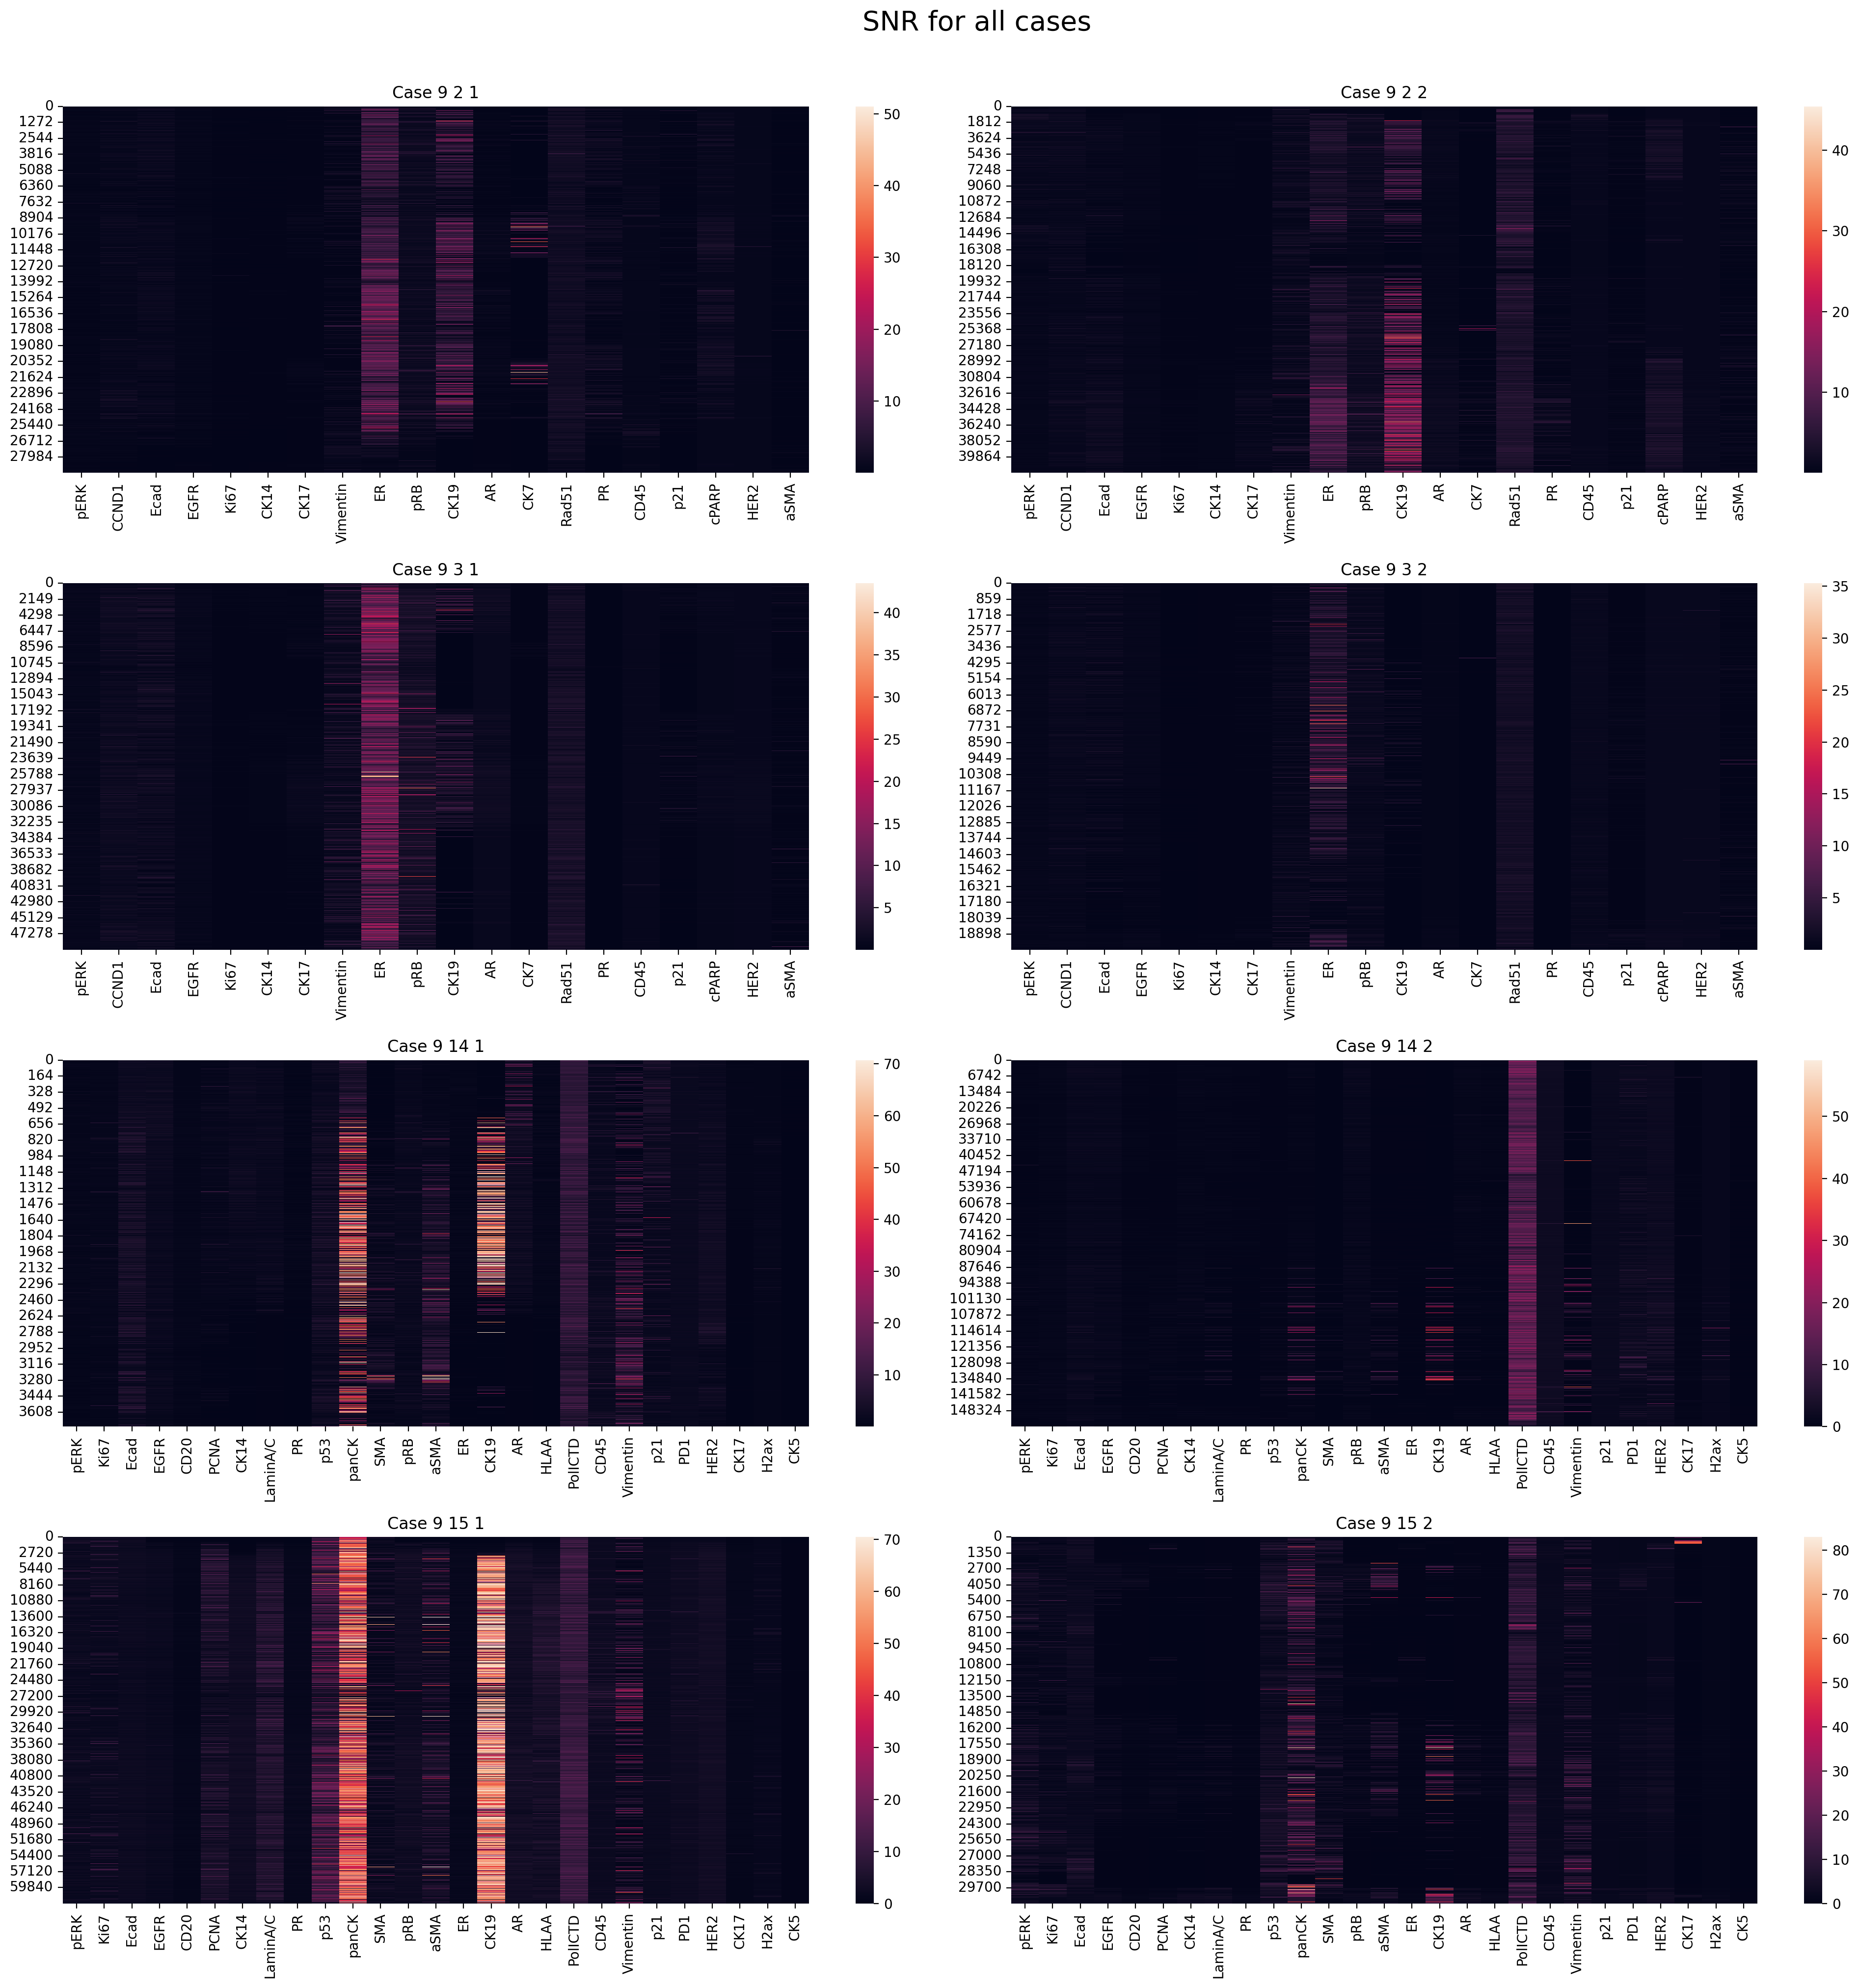

In [32]:
fig, axs = plt.subplots(4,2, figsize=(20,20), dpi=200)

ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]
ax5 = axs[2][0]
ax6 = axs[2][1]
ax7 = axs[3][0]
ax8 = axs[3][1]

sns.heatmap(snr_9_2_1[columns_9_2_1], ax=ax1)
sns.heatmap(snr_9_2_2[columns_9_2_2], ax=ax2)
sns.heatmap(snr_9_3_1[columns_9_3_1], ax=ax3)
sns.heatmap(snr_9_3_2[columns_9_3_1], ax=ax4)
sns.heatmap(snr_9_14_1[columns_9_14_1], ax=ax5)
sns.heatmap(snr_9_14_2[columns_9_14_2], ax=ax6)
sns.heatmap(snr_9_15_1[columns_9_15_1], ax=ax7)
sns.heatmap(snr_9_15_2[columns_9_15_2], ax=ax8)


ax1.set_title("Case 9 2 1")
ax2.set_title("Case 9 2 2")
ax3.set_title("Case 9 3 1")
ax4.set_title("Case 9 3 2")
ax5.set_title("Case 9 14 1")
ax6.set_title("Case 9 14 2")
ax7.set_title("Case 9 15 1")
ax8.set_title("Case 9 15 2")

fig.suptitle("SNR for all cases", fontsize=20, y=1.01)

plt.tight_layout()
plt.savefig(f'data/SNR Cases.png', dpi=fig.dpi,bbox_inches='tight',facecolor='w')

# Save csv files

In [15]:
from pathlib import Path
import shutil

In [17]:
save_path = Path("../data/tumor_s3_af")

if not save_path.exists():
    save_path.mkdir(parents=True, exist_ok=True)
    
save_path.mkdir(parents=True, exist_ok=True)

snr_9_2_1.to_csv(f"{save_path}/9_2_1.csv", index=False)
snr_9_2_2.to_csv(f"{save_path}/9_2_2.csv", index=False)
snr_9_3_1.to_csv(f"{save_path}/9_3_1.csv", index=False)
snr_9_3_2.to_csv(f"{save_path}/9_3_2.csv", index=False)
snr_9_14_1.to_csv(f"{save_path}/9_14_1.csv", index=False)
snr_9_14_2.to_csv(f"{save_path}/9_14_2.csv", index=False)
snr_9_15_1.to_csv(f"{save_path}/9_15_1.csv", index=False)
snr_9_15_2.to_csv(f"{save_path}/9_15_2.csv", index=False)
